## **Etude pratique: le chemin du drone**
### **1 - Les import**
Dans ce fichier, nous utilisons 4 librairies. Deux sont utilisées pour le parcours du drone. **`osnmx`** pour générer le graph à partir d'une ville ou d'un quartier et **`networkX`** pour le traitement du graphe. 

La librairie **`datetime`** est utilisée pour calculer le temps d'éxécution de notre code et enfin **`colorama`** pour l'affichage graphique des informations.

In [ ]:
import osmnx as ox
import networkx as nx
import datetime
from colorama import Fore, Style

### **2 - Chargement du graphe**
La fonction `loadingGraph` prend en paramètre _`neighborhood`_ le quartier, _`city`_ la ville et _`country`_ le pays. Si on veut juste charger une ville mais pas un quartier en particulier on passe _`neighborhood`_ à **Null**. On utilise donc la méthode **`graph_from_place`** pour récupérer le graph à partir de la localisation donnée. On convertit ce graphe en graphe non orienté avec la méthode **`to_undirected()`**.

Pour le parcours du drone on utilise un graphe non orienté puisque cela nous sera utile plus tard pour rendre notre graphe eulérien. Ensuite, on return notre graphe.

In [ ]:
def loadingGraph(neighborhood, city, country, road_type):
    if (neighborhood):
        G = ox.graph_from_place(neighborhood + ", " + city + ", " + country, network_type=road_type, simplify=True).to_undirected()
    else:
        G = ox.graph_from_place(city + ", " + country, network_type=road_type, simplify=True).to_undirected()
    G = nx.convert_node_labels_to_integers(G) 
    return G

### **3 - Rendre notre graphe eulérien**
On a besoin de rendre notre graphe eulérien pour pouvoir trouver un cycle eulérien. Ceci nous permettra de parcourir la totalité de notre graphe. Ce que eulerize va faire, c'est rajouter des arrêtes aux noeuds de degré impaire puisque dans un graphe eulérien tous les noeuds sont de degré paire. La méthode `eulerize` est dans la bibliothèque **`networkX`**.

In [ ]:
def eulerized(G):
    H = nx.eulerize(G)
    return H

### **4 - Trouver le chemin du drone à partir du graphe**
On a donc maintenant en paramètre _`H`_: un graphe eulérien. On utilise la méthode `eulerian_circuit` est dans la bibliothèque **`networkX`**. Cette dernière renvoie une liste du chemin de cette manière [(0, 13), (13, 27), (27, 4)...]. Le paramètre _`GPS`_ contiendra le nom des rues parcourues et _`list_`_ la liste des noeuds parcourus.

On va donc devoir parcourir cette liste pour obtenir une liste de noeud à parcourir. On récupère simplement tous les premiers éléments de chaque pair et on les ajoute dans _`list_`_. Ensuite, on ajoute le nom de de l'arette dans _`GPS`_ si on arrive à le trouver sinon on continue le parcours de la liste. Enfin on renvoie nos deux listes _`GPS`_ et _`list_`_. 

In [ ]:
def get_GPS(H):
    tmp = nx.eulerian_circuit(H)
    list_ = []
    GPS = []
    for elem in tmp:
        list_.append(elem[0])
        name = ""
        try:
            name = H.edges[(elem[0], elem[1], 0)]['name']
            if (type(name) == list):
                for road in name:
                    GPS.append(road)
            else:
                GPS.append(name)
        except KeyError:
            continue
    return GPS,list_

### **5 - Afficher le chemin 'GPS' du drone**
Il s'agit tout simplement d'un _pretty printer_ pour afficher joliment le chemin parcouru par le drone avec le nom des rues, avenues, chemins etc... empruntés.Le paramètre _GPS_ est la liste des chemins empruntés. On utilise **`colorama`** pour afficher joliment le chemin.

In [5]:
def pretty_printGPS(GPS):
    print(Fore.RED + Style.BRIGHT + "Start the drone" + Style.RESET_ALL)
    i = 0
    for i in range (0 , len(GPS)):
        if i == 0:
            print("Start by taking the " + Fore.GREEN + Style.DIM + GPS[i] + Style.RESET_ALL)
        else:
            if GPS[i] == GPS[i - 1]:
                continue
            else:
                print("Continue with " + Fore.GREEN + Style.DIM + str(GPS[i]) + Style.RESET_ALL)
    print(Fore.RED + Style.BRIGHT + "Land the drone")

### **6 - Fonction principale**
Cette fonction prend en paramètre les informations de localisation et différents booléens qui sont des options d'affichage graphique de sinformations (la carte, le chemin du drone, le chemin gps). On utilise aussi la librairie **`datetime`** pour afficher le temps d'éxécution des différents modules de notre programme.

In [6]:
def main(neighborhood, city, country, road_type, print_gps, print_map, print_drone):
    
    #Graph Loading
    begin_load = datetime.datetime.now()
    print(Fore.GREEN + Style.BRIGHT + "Loading graph..." + Style.RESET_ALL)
    G = loadingGraph(neighborhood, city, country, road_type)
    print(Fore.BLUE + Style.BRIGHT + "Loading graph time: " + str(datetime.datetime.now() - begin_load))
    if (print_map):
        fig, ax = ox.plot_graph(ox.project_graph(G))


    #Eulerize Graph
    begin_euler = datetime.datetime.now()
    print(Fore.GREEN + Style.BRIGHT + "Beginning eulerization...")
    H = nx.eulerize(G)
    print(Fore.BLUE + Style.BRIGHT + "Eulerize time: " + str(datetime.datetime.now() - begin_euler))
    
    #Option : print the GPS path
    liste = []
    gps,liste = get_GPS(H)
    if (print_gps):
        pretty_printGPS(gps)   
    
    #Print the figures
    if (print_drone):
        fig, ax = ox.plot_graph_route(G, liste, route_linewidth=4, node_size=1, bgcolor='k')

    print(Fore.RED + Style.BRIGHT + "Total time: " + str(datetime.datetime.now() - begin_load))

### **Entrée principale de notre programme** 

Loading graph...
Loading graph time: 0:00:00.645485


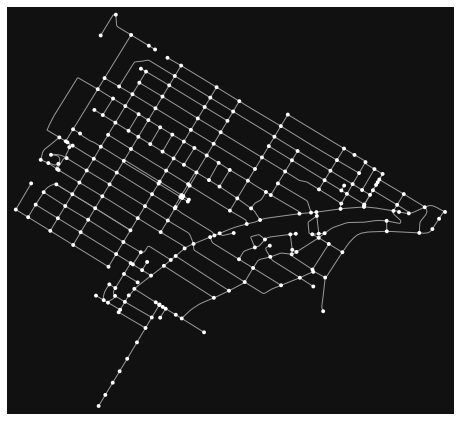

Beginning eulerization...
Eulerize time: 0:00:00.863120


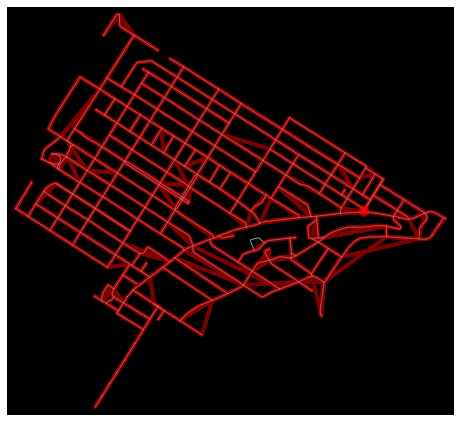

Total time: 0:00:02.047116
Loading graph...
Loading graph time: 0:00:01.934339


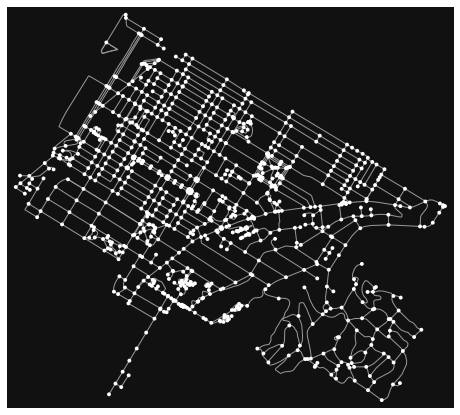

Beginning eulerization...
Eulerize time: 0:01:04.298010


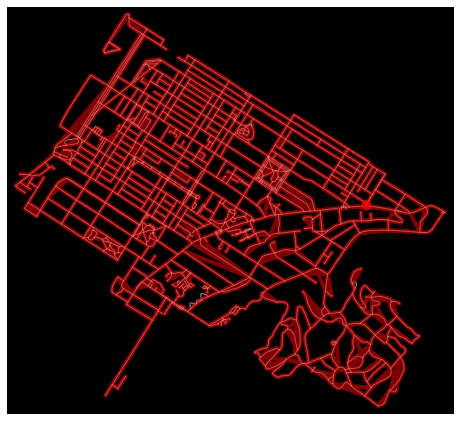

Total time: 0:01:07.317589


In [7]:
main("Outremont", "Montreal", "Canada", "drive", False, True, True)
main("Outremont", "Montreal", "Canada", "walk", False, True, True)